## First, we're going to compile our web-scraping program

In [22]:
%%bash
cd ../web-scraping
make compile

g++ -std=c++20 -Wall -Wextra -pedantic -Werror -Weffc++ curl.cpp -c
g++ -std=c++20 -Wall -Wextra -pedantic -Werror -Weffc++ csv_writer.cpp -c
g++ -std=c++20 -Wall -Wextra -pedantic -Werror -Weffc++ -I/opt/curl/include -O3 curl.o csv_writer.o main.cpp -o main -L/opt/curl/lib -lcurl


## Now we can run it. Let's see...

In [26]:
%%bash
cd ../web-scraping
./main help

Valid command-line arguments:
list: see available data sources with their indexes in brackets
[index]: download a CSV file associated with index
help: list all available command-line arguments (basically this view)


## Let's try to list available data sources 

In [27]:
%%bash
cd ../web-scraping
./main list

[0]: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
[1]: https://finance.yahoo.com/quote/%5EDJI/history?p=%5EDJI
[2]: https://finance.yahoo.com/quote/%5EIXIC/history?p=%5EIXIC
[3]: https://finance.yahoo.com/quote/CL%3DF/history?p=CL%3DF


## For instance, we're going to download a CSV file from the 0th source

In [29]:
%%bash
cd ../web-scraping
./main 0

The file is being prepared. Please wait...

Your file is ready! File name: data0.csv


## Now we're ready to use it

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../web-scraping/data0.csv',index_col='Date',parse_dates=True)
idx = pd.date_range('01-10-2022', '06-03-2022')
data = data.reindex(idx, fill_value=None)
data.fillna(method='bfill',inplace=True)
# data.interpolate(method ='linear', limit_direction ='backward', inplace=True)

In [3]:
data.head(15)

,Open,High,Low,Close*,Adj Close**,Volume
2022-01-10,4669.14,4714.13,4638.27,4713.07,4713.07,3.421600e+09
2022-01-11,4669.14,4714.13,4638.27,4713.07,4713.07,3.421600e+09
2022-01-12,4728.59,4748.83,4706.71,4726.35,4726.35,3.060040e+09
2022-01-13,4733.56,4744.13,4650.29,4659.03,4659.03,3.539830e+09
2022-01-14,4637.99,4665.13,4614.75,4662.85,4662.85,3.483530e+09
2022-01-15,4632.24,4632.24,4568.70,4577.11,4577.11,3.324960e+09
2022-01-16,4632.24,4632.24,4568.70,4577.11,4577.11,3.324960e+09
2022-01-17,4632.24,4632.24,4568.70,4577.11,4577.11,3.324960e+09
2022-01-18,4632.24,4632.24,4568.70,4577.11,4577.11,3.324960e+09
2022-01-19,4588.03,4611.55,4530.20,4532.76,4532.76,3.387370e+09


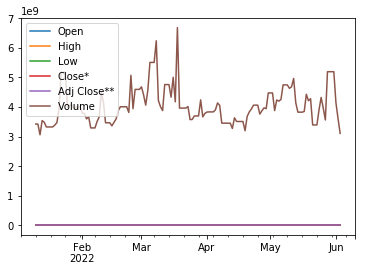

In [4]:
data.plot()

In [5]:
data['6-month-SMA'] = data['Open'].rolling(window=6).mean()

In [6]:
data.dropna(inplace=True)

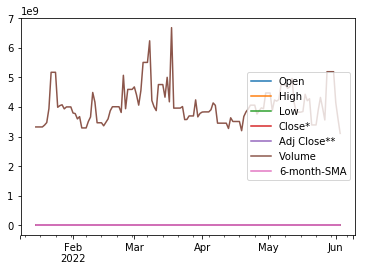

In [7]:
data.plot()

In [8]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


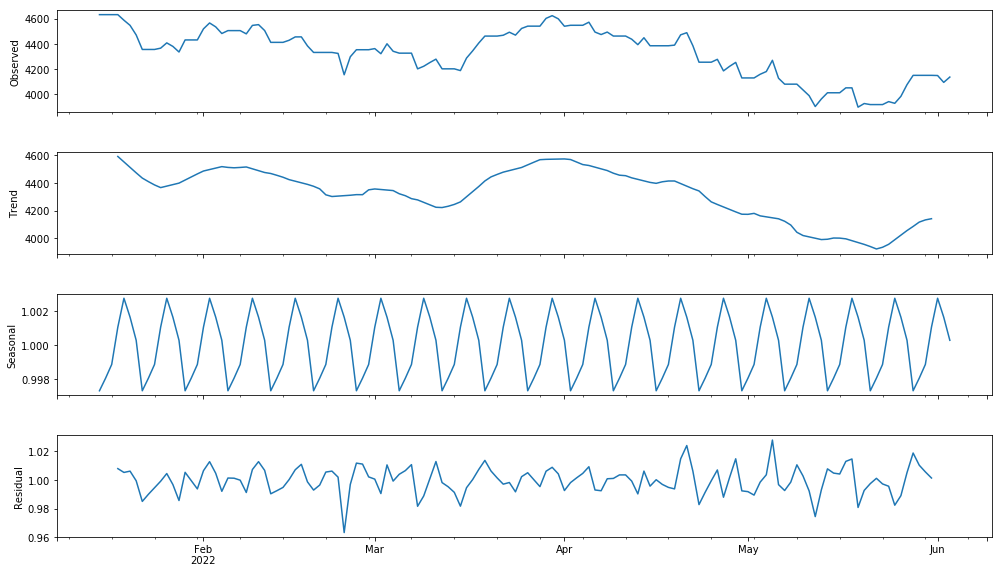

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Open'], model='mul')
result.plot().set_size_inches((16, 9));

As we can see from this model the data seams to not be seasonal (extremly small range on seasonality y axis of length 0.004) and the trend seams to be upward. 


We can compare seasonality factor with clearly seasonal dataset to check if our range is trully small

In [10]:
df = pd.read_csv('../data/airline_passengers.csv',index_col='Month',parse_dates=True)


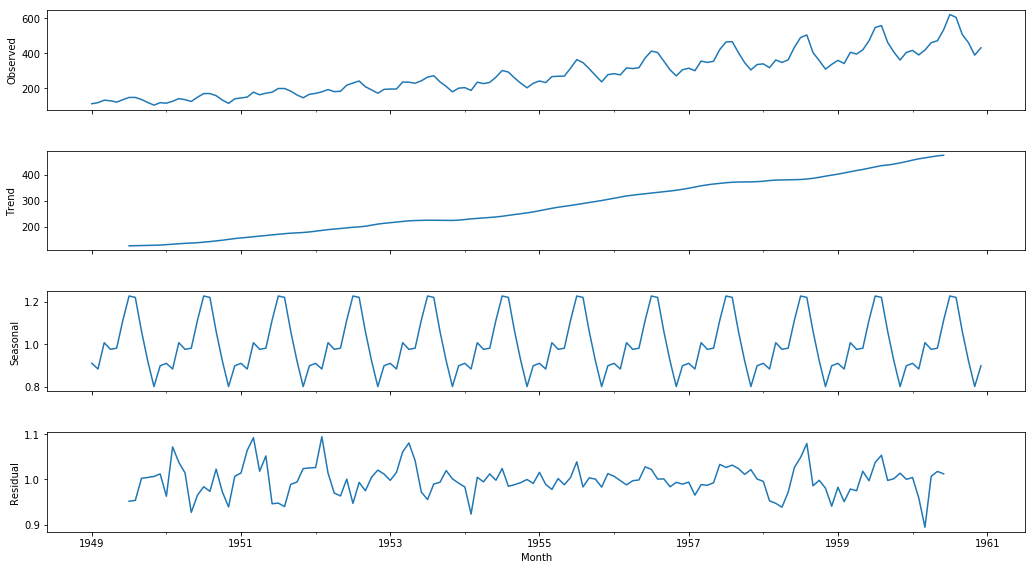

In [11]:
result1 = seasonal_decompose(df['Thousands of Passengers'], model='mul')
result1.plot().set_size_inches((16, 9));

As we can see the length of y axis of the seasonality chart should be way higher for the dataset with seasonality (here it has lenght of 0.4)

## Let's not forget to clean unnecessary files once we don't need them

In [30]:
%%bash
cd ../web-scraping
make clean

rm -f curl.o csv_writer.o
